In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## Load and Explore Data

In [3]:
data = datasets.load_digits()

In [5]:
print(data["DESCR"])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [6]:
data.data.shape

(1797, 64)

In [7]:
data.target.shape

(1797,)

In [75]:
X = data.data
y = data.target

## Preprocess

In [74]:
# from sklearn.preprocessing import scale
# mean = X.mean()
# std = X.std()
# X = (X - mean)/std

(array([1.94292098, 0.12534974, 0.18802461, 0.25069948, 0.12534974,
        0.31337435, 0.31337435, 0.12534974, 0.37604922, 0.25069948]),
 array([-0.8117562 , -0.56245373, -0.31315126, -0.06384879,  0.18545368,
         0.43475616,  0.68405863,  0.9333611 ,  1.18266357,  1.43196604,
         1.68126851]),
 <a list of 1 Patch objects>)

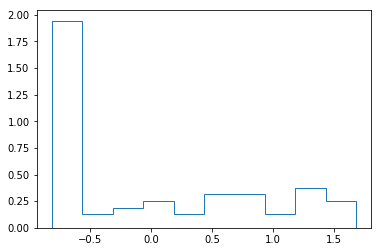

In [68]:
plt.hist(X[0,:], density=True, histtype="step")

## Visualization

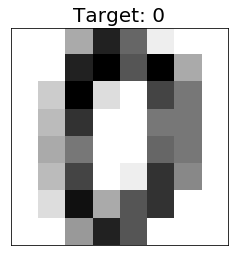

In [69]:
def plot_digit(number_of_digit, data, target):
    row = data[number_of_digit,:]
    plt.imshow(row.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    plt.title("Target: " + str(target[number_of_digit]), size=20)
    
plot_digit(0,X,y)

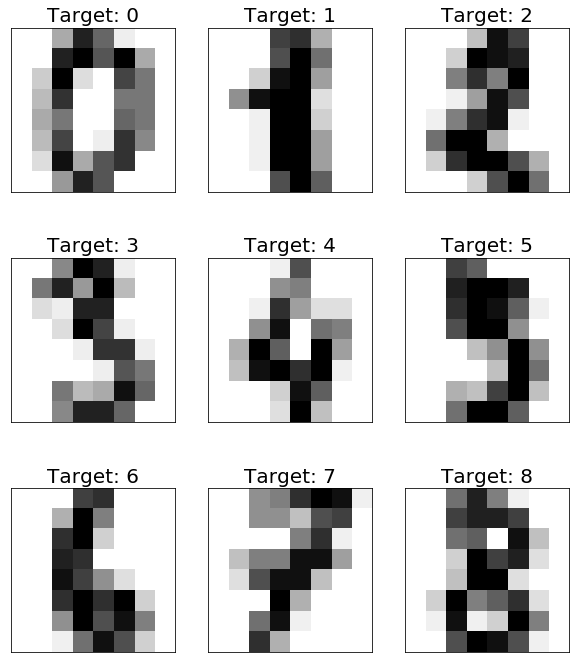

In [70]:
fig = plt.figure(figsize=(10, 12))
fig.tight_layout()
for i in range(9):
    plt.subplot(3,3, i+1)
    plot_digit(i, X, y)

## SVM Classification

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = svm.SVC(gamma=0.001)
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)
report = metrics.classification_report(y_prediction,y_test)
print("SVM Classification Report")
print(report)

SVM Classification Report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        55
          1       1.00      0.98      0.99        56
          2       1.00      1.00      1.00        52
          3       0.96      0.98      0.97        55
          4       1.00      1.00      1.00        64
          5       1.00      0.99      0.99        74
          6       1.00      1.00      1.00        57
          7       0.98      0.98      0.98        62
          8       0.98      0.98      0.98        52
          9       0.97      0.99      0.98        67

avg / total       0.99      0.99      0.99       594



In [77]:
print("Confusion Matrix")
confusion_matrix = metrics.confusion_matrix(y_prediction, y_test)
print(confusion_matrix)

Confusion Matrix
[[55  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  1  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  1]
 [ 0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  1  0 73  0  0  0  0]
 [ 0  0  0  0  0  0 57  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  1]
 [ 0  0  0  1  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0  1  0 66]]


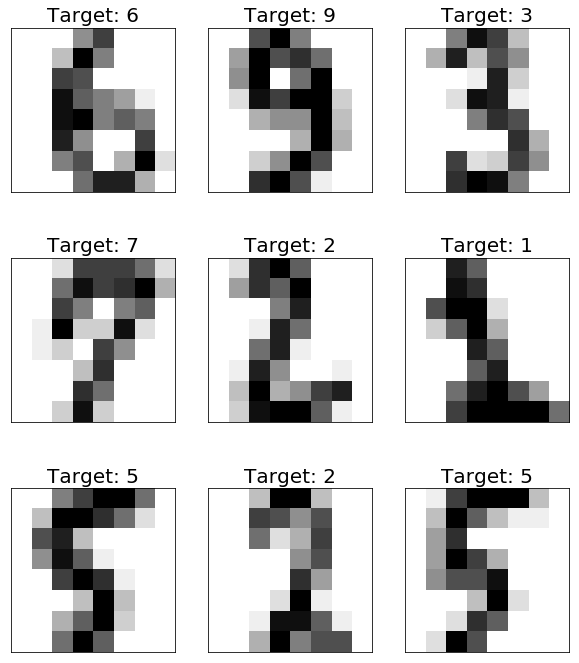

In [78]:
fig = plt.figure(figsize=(10, 12))
fig.tight_layout()
for i in range(9):
    plt.subplot(3,3, i+1)
    plot_digit(i, X_test, y_prediction)